In [1]:
import numpy as np
from sympy import *
import sympy

# Интерполяция многочленом Лагранжа

In [2]:
def lagrange_l(x_ls: list, x_j):
    x = symbols('x')
    lg = 1
    n = len(x_ls)
    for i in range(n):
        if x_j == x_ls[i]:
            continue
        lg *= (x - x_ls[i]) / (x_j - x_ls[i])
    return lg


def lagrange_poly(x, y):
    if len(x) != len(y):
        raise ValueError("x и y не одинаковой длины")

    n = len(x)
    
    L = 0
    for i in range(n):
        L += y[i] * lagrange_l(x, x[i])
    return L

# Интерполяция многочленом Ньютона

In [3]:
def get_a(x: list, y: list):
    a_table = np.zeros(shape=(len(y) - 1, len(y) - 1))
    n = a_table.shape[0]

    for i in range(n):
        a_table[0, i] = (y[i + 1] - y[i]) / (x[i+1] - x[i])

    for i in range(1, n):
        for j in range(n - i):
            a_table[i, j] = (a_table[i - 1, j + 1] - a_table[i - 1, j]) / (x[i+1+j] - x[j])

    return a_table


def newton_poly(x_ls: list, y_ls: list):
    if len(x_ls) != len(y_ls):
        raise TypeError("x и у не одинаковой длины")

    n = len(x_ls)

    x = symbols('x')
    N = 0
    a_table = get_a(x_ls, y_ls)
    for i in range(n):
        if i == 0:
            N += y_ls[0]
            continue
        x_poly = 1
        for j in range(i):
            x_poly *= (x-x_ls[j])

        N += a_table[i-1, 0] * x_poly

    return N

In [4]:
x_1 = [2, 4, 5]
y_1 = [1, 15, 28]
point_1 = 3

x_2 = [1, 2, 3, 4, 5, 6]
y_2 = [1, 4, 9, 16, 25, 36]
point_2 = 25

x_3 = np.linspace(0, 3, num=6)
y_3 = np.sin(x_3)
point_3 = np.pi

In [5]:
def solve(x, y, point, silent=False):
    x_var = symbols('x')
    newton = newton_poly(x, y)
    lagrange = lagrange_poly(x, y)
    
    if silent:
        return lagrange, newton
    
    print(f"Входные данные:\n"
          f"x = {x}\n"
          f"y = {y}")

    print('-' * 80)

    print(f'\tИнтерполяционный многочлен Лагранжа:\nL(x) = {lagrange}')
    print(f'Значение в точке х = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

    print('-' * 80)

    print(f'\tИнтерполяционный многочлен Ньютона:\nN(x) = {newton}')
    print(f'Значение в точке х = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')
    return lagrange, newton

## Тестовые примеры

### Пример 1

In [6]:
lag, newton = solve(x_1, y_1, point_1)

Входные данные:
x = [2, 4, 5]
y = [1, 15, 28]
--------------------------------------------------------------------------------
	Интерполяционный многочлен Лагранжа:
L(x) = (5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)
Значение в точке х = 3
L(3) = 6.0000
--------------------------------------------------------------------------------
	Интерполяционный многочлен Ньютона:
N(x) = 7.0*x + 2.0*(x - 4)*(x - 2) - 13.0
Значение в точке х = 3
N(3) = 6.0000


### Интерполяционный многочлен Лагранжа

In [7]:
lag

(5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)

In [8]:
simplify(lag)

2*x**2 - 5*x + 3

### Интерполяционный многочлен Ньютона

In [9]:
newton

7.0*x + 2.0*(x - 4)*(x - 2) - 13.0

In [10]:
simplify(newton)

2.0*x**2 - 5.0*x + 3.0

## Пример 2


In [11]:
lag, newton = solve(x_2, y_2, point_1)

Входные данные:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]
--------------------------------------------------------------------------------
	Интерполяционный многочлен Лагранжа:
L(x) = (6/5 - x/5)*(5/4 - x/4)*(4/3 - x/3)*(3/2 - x/2)*(2 - x) + 4*(3/2 - x/4)*(5/3 - x/3)*(2 - x/2)*(3 - x)*(x - 1) + 9*(2 - x/3)*(5/2 - x/2)*(4 - x)*(x/2 - 1/2)*(x - 2) + 16*(3 - x/2)*(5 - x)*(x/3 - 1/3)*(x/2 - 1)*(x - 3) + 25*(6 - x)*(x/4 - 1/4)*(x/3 - 2/3)*(x/2 - 3/2)*(x - 4) + 36*(x/5 - 1/5)*(x/4 - 1/2)*(x/3 - 1)*(x/2 - 2)*(x - 5)
Значение в точке х = 3
L(3) = 9.0000
--------------------------------------------------------------------------------
	Интерполяционный многочлен Ньютона:
N(x) = 3.0*x + 1.0*(x - 2)*(x - 1) - 2.0
Значение в точке х = 3
N(3) = 9.0000


### Интерполяционный многочлен Лагранжа

In [12]:
lag

(6/5 - x/5)*(5/4 - x/4)*(4/3 - x/3)*(3/2 - x/2)*(2 - x) + 4*(3/2 - x/4)*(5/3 - x/3)*(2 - x/2)*(3 - x)*(x - 1) + 9*(2 - x/3)*(5/2 - x/2)*(4 - x)*(x/2 - 1/2)*(x - 2) + 16*(3 - x/2)*(5 - x)*(x/3 - 1/3)*(x/2 - 1)*(x - 3) + 25*(6 - x)*(x/4 - 1/4)*(x/3 - 2/3)*(x/2 - 3/2)*(x - 4) + 36*(x/5 - 1/5)*(x/4 - 1/2)*(x/3 - 1)*(x/2 - 2)*(x - 5)

In [13]:
simplify(lag)

x**2

### Интерполяционный многочлен Ньютона

In [14]:
newton

3.0*x + 1.0*(x - 2)*(x - 1) - 2.0

In [15]:
simplify(newton)

1.0*x**2

In [16]:
k = 3
m = 1.5

x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
p = np.array([0, 0.41, 0.79, 1.13, 1.46, 1.76, 2.04, 2.3, 2.55, 2.79, 3.01])

y = p + (-1)**k * m
point = 0.47

## Пример 3

In [17]:
lag, newton = solve(x_3, y_3, point_3, True)

In [18]:
import matplotlib.pyplot as plt

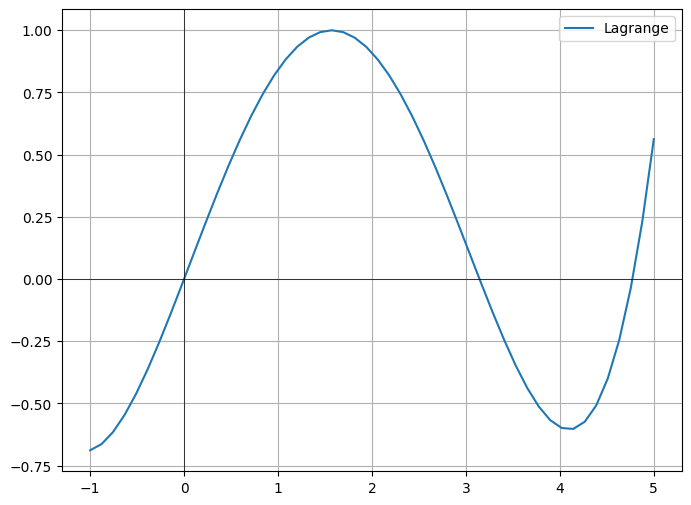

In [19]:
x_var = symbols('x')
X = np.linspace(-1, 5, 50, endpoint=True)
L = lambdify(x_var, lag)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
plt.plot(X, L_y, label='Lagrange')

plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

## Задание (Вариант 3)


In [20]:
lag, newton = solve(x, y, point)

Входные данные:
x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [-1.5  -1.09 -0.71 -0.37 -0.04  0.26  0.54  0.8   1.05  1.29  1.51]
--------------------------------------------------------------------------------
	Интерполяционный многочлен Лагранжа:
L(x) = -10.9*x*(1.11111111111111 - 1.11111111111111*x)*(1.125 - 1.25*x)*(1.14285714285714 - 1.42857142857143*x)*(1.16666666666667 - 1.66666666666667*x)*(1.2 - 2.0*x)*(1.25 - 2.5*x)*(1.33333333333333 - 3.33333333333333*x)*(1.5 - 5.0*x)*(2.0 - 10.0*x) - 3.55*x*(1.25 - 1.25*x)*(1.28571428571429 - 1.42857142857143*x)*(1.33333333333333 - 1.66666666666667*x)*(1.4 - 2.0*x)*(1.5 - 2.5*x)*(1.66666666666667 - 3.33333333333333*x)*(2.0 - 5.0*x)*(3.0 - 10.0*x)*(10.0*x - 1.0) - 1.23333333333333*x*(1.42857142857143 - 1.42857142857143*x)*(1.5 - 1.66666666666667*x)*(1.6 - 2.0*x)*(1.75 - 2.5*x)*(2.0 - 3.33333333333333*x)*(2.5 - 5.0*x)*(4.0 - 10.0*x)*(5.0*x - 0.5)*(10.0*x - 2.0) - 0.1*x*(1.66666666666667 - 1.66666666666667*x)*(1.8 - 2.0*x)*(2.0 - 2.5*x

### Интерполяционный многочлен Лагранжа

In [21]:
simplify(lag)

3279.32098765436*x**10 - 16823.7433862442*x**9 + 37136.2433862434*x**8 - 46113.5912698406*x**7 + 35322.1643518526*x**6 - 17192.621527778*x**5 + 5268.12692901208*x**4 - 966.267030423265*x**3 + 92.7493452380966*x**2 + 0.628214285714268*x - 1.5

### Интерполяционный многочлен Ньютона

In [22]:
simplify(newton)

3279.32098765431*x**10 - 16823.7433862433*x**9 + 37136.2433862433*x**8 - 46113.5912698412*x**7 + 35322.1643518518*x**6 - 17192.6215277778*x**5 + 5268.12692901234*x**4 - 966.267030423279*x**3 + 92.7493452380952*x**2 + 0.628214285714282*x - 1.5

### Построим график полученного многочлена

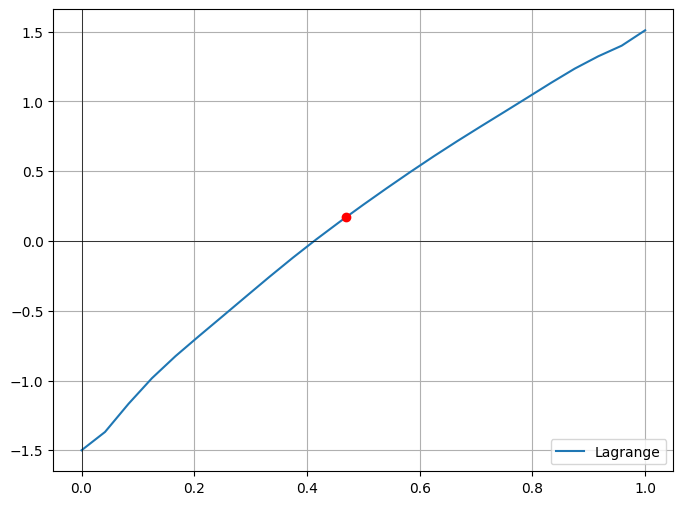

In [23]:
x_var = symbols('x')
X = np.linspace(0, 1, 25, endpoint=True)
L = lambdify(x_var, lag)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
plt.plot(X, L_y, label='Lagrange')
plt.plot(point, L(point), 'ro')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()